<a href="https://colab.research.google.com/github/nayun12/Tobigs_17/blob/main/KNN_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17기 KNN 정규세션 과제

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Tobigs/과제/blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [ ]:
# Target
import numpy as np
print(f"gender cound: {df['Gender'].count()}")
print(f"gender not null count : {np.round(df['Gender'].count()/len(df)*100, 2)}")

gender cound: 4998
gender not null count : 100.0


([<matplotlib.patches.Wedge at 0x7efc4f5dd7d0>,
 [Text(-0.785842545718456, 0.7697087068097492, 'M'),
  Text(0.7858425457184559, -0.7697087068097493, 'F')])

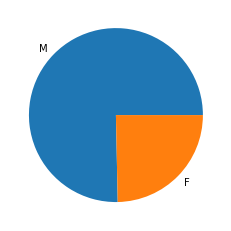

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

target_label_count = df['Gender'].value_counts()
plt.pie(target_label_count, labels = target_label_count.index)

남성이 여성에 비해 3배정도 많음을 확인할 수 있다.

In [ ]:
num_of_null = df.isnull().sum()
percent = (num_of_null / df.isnull().count() * 100)
pd.concat([num_of_null, percent], axis = 1, keys=['# of null', 'Percent']).sort_values(by='Percent', ascending=False)

,# of null,Percent
Product_Category_3,3454,69.107643
Product_Category_2,1533,30.672269
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000


Product_Category_3은 약 69%가 null값이므로 제거한다.

In [ ]:
df = df.drop('Product_Category_3', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Purchase                    4998 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 468.6+ KB


나머지 null값은 제거한다.

In [ ]:
df = df.dropna(axis=0)

In [ ]:
num_of_null = df.isnull().sum()
percent = (num_of_null / df.isnull().count() * 100)
pd.concat([num_of_null, percent], axis = 1, keys=['# of null', 'Percent']).sort_values(by='Percent', ascending=False)

,# of null,Percent
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3465 entries, 0 to 4997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     3465 non-null   int64  
 1   Product_ID                  3465 non-null   object 
 2   Gender                      3465 non-null   object 
 3   Age                         3465 non-null   object 
 4   Occupation                  3465 non-null   int64  
 5   City_Category               3465 non-null   object 
 6   Stay_In_Current_City_Years  3465 non-null   object 
 7   Marital_Status              3465 non-null   int64  
 8   Product_Category_1          3465 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Purchase                    3465 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 324.8+ KB


Purchase를 제외한 변수는 범주형 변수이므로, object로 변환한다.

In [ ]:
obj_columns = ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2']

for col in obj_columns:
    df[col] = df[col].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3465 entries, 0 to 4997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     3465 non-null   int64 
 1   Product_ID                  3465 non-null   object
 2   Gender                      3465 non-null   object
 3   Age                         3465 non-null   object
 4   Occupation                  3465 non-null   object
 5   City_Category               3465 non-null   object
 6   Stay_In_Current_City_Years  3465 non-null   object
 7   Marital_Status              3465 non-null   object
 8   Product_Category_1          3465 non-null   object
 9   Product_Category_2          3465 non-null   object
 10  Purchase                    3465 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 324.8+ KB


In [ ]:
def plot_hist(df, feature):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.hist(df[feature])
    plt.show()

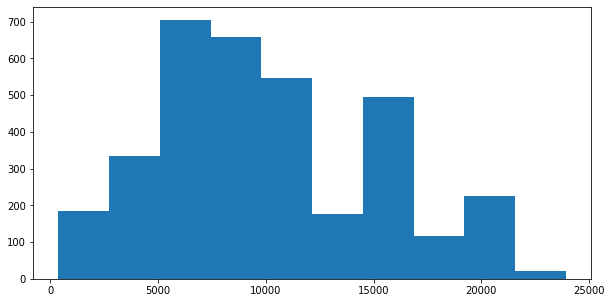

In [ ]:
# Purchase
plot_hist(df, 'Purchase')

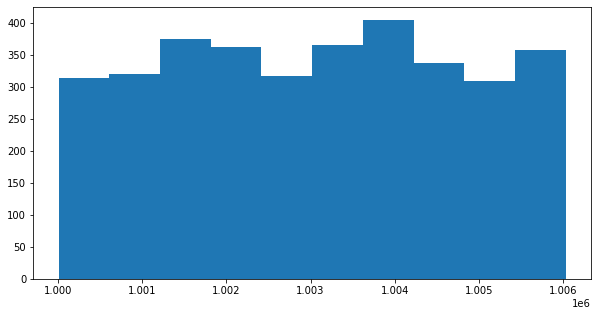

In [ ]:
# User_ID
plot_hist(df, 'User_ID')

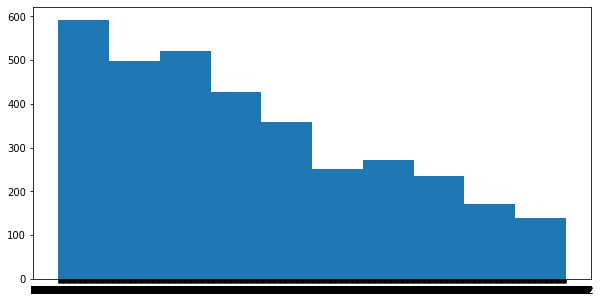

In [ ]:
# Product_ID
plot_hist(df, 'Product_ID')

User_ID는 유의미한 결과를 얻을 수 없으므로 제거한다.

In [ ]:
df = df.drop('User_ID', axis=1)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P00046042,F,0-17,10,A,3,0,5,17.0,2010
2,P00048942,F,0-17,10,A,1,0,1,4.0,7696
3,P00145242,F,0-17,10,A,3,0,2,4.0,16429
4,P00106742,F,0-17,10,A,3,0,3,5.0,5780
6,P00000242,F,0-17,10,A,3,0,2,4.0,12707


In [ ]:
X = df.drop("Gender", axis=1)
y = df['Gender']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                   shuffle = True,
                                                   random_state = 1015,
                                                   stratify = y)

X_train.reset_index(drop = True, inplace=True)
X_test.reset_index(drop = True, inplace=True)

In [ ]:
cat_columns = [c for (c, t) in zip(X.dtypes.index, X.dtypes) if t == 'O'] 
num_columns = [c for c in X.columns if c not in cat_columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in num_columns:
    X_train.loc[:, col] = scaler.fit_transform(np.array(X_train[col]).reshape(-1, 1))
    X_test.loc[:, col] = scaler.transform(np.array(X_test[col]).reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)

X_all = pd.concat([X_train, X_test], axis = 0).reset_index(drop=True)

ohe.fit(X_all[cat_columns])

OneHotEncoder(sparse=False)

In [ ]:
new_X = ohe.transform(X_all[cat_columns])

ohe_columns = ohe.categories_[0].tolist()

for idx in range(len(ohe.categories_)-1):
    ohe_columns += ohe.categories_[idx+1].tolist()

In [ ]:
X_cat = pd.DataFrame(new_X, columns = ohe_columns)
X_cat.head()

,P00000142,P00000242,P00000342,P00000442,P00000642,P00000742,P00001042,P00001142,P00001242,P00001342,P00001542,P00001642,P00001742,P00002142,P00002242,P00002442,P00002542,P00002942,P00003242,P00003442,P00003542,P00003942,P00004142,P00004242,P00004442,P00004542,P00004742,P00004842,P00005042,P00005742,P00005942,P00006042,P00006342,P00006542,P00006942,P00007242,P00007542,P00008042,P00008442,P00008642,...,B,C,0,1,2,3,4+,0,1,1,10,11,12,13,14,15,2,3,4,5,6,7,8,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_all.drop(columns=cat_columns, inplace=True)

X = pd.concat([X_all, X_cat], axis = 1)

In [ ]:
X_train = X.iloc[:X_train.shape[0], :]
X_test = X.iloc[X_train.shape[0]:, :]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Test Score : {:.3f}".format(knn.score(X_test, y_test)))

Test Score : 0.730


In [ ]:
results = knn.predict(X_test)
results

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
pd.crosstab(y_test, results, rownames=['Real'], colnames=['Predicted'], margins=True, margins_name='total')

Predicted,0,1,total
Real,,,
0,37,132,169
1,55,469,524
total,92,601,693


label1을 제대로 예측하지 못한다.

In [ ]:
np.unique(y_test).tolist()

[0, 1]

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,results, digits=2))

              precision    recall  f1-score   support

           0       0.40      0.22      0.28       169
           1       0.78      0.90      0.83       524

    accuracy                           0.73       693
   macro avg       0.59      0.56      0.56       693
weighted avg       0.69      0.73      0.70       693



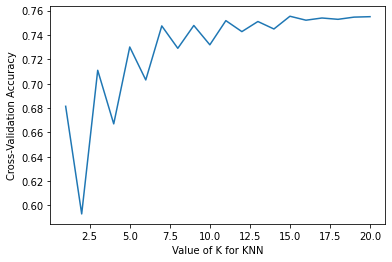

In [ ]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1,21))      
k_score = []                     

for k in k_range :
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring = "accuracy")   
    k_score.append(scores.mean()) 

plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

K값을 높이면 Acc가 증가하지만 어느 정도에 수렴한다.

Threshold값을 조절하여 성능을 비교해보자.

In [ ]:
# 0이라 예측할 확률을 저장

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_probs = knn.predict_proba(X_test)
y_probs1 = y_probs[:, 0]

In [ ]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 101)
acc = []

for t in thresholds:
    y_pred = y_probs1 <= t
    acc.append(accuracy_score(y_test, y_pred))
    
best_threshold = thresholds[np.argmax(acc)]

In [ ]:
print("임곗값이 t={0}일 때 {1:.2f}".format(best_threshold, acc[np.argmax(acc)] * 100))
print("임곗값이 0.5일 때 {0:.2f}".format(acc[list(thresholds).index(0.5)] * 100))


임곗값이 t=1.0일 때 75.61
임곗값이 0.5일 때 73.02


약간의 성능이 향상되었다.